# TP1 : Frequentist Statistics.

In [1]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import statsmodels.api as sm  # Linear regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std  # Linear regression
import matplotlib.pyplot as plt  # Plots
from matplotlib import style
# Enable nice plots
try:
    style.use('seaborn-v0_8')
except:
    style.use('seaborn')

## Table of contents :
1. [Exercise 1 : Classicals laws](#part1)
1. [Exercise 2 : Law of Large Numbers](#part2)
1. [Exercise 3 : Central Limit Theorem](#part3)
1. [Exercise 4 : Simple Linear Regression](#part4)
1. [Exercise 5 : Convergence in law](#part5)
1. [Exercise 6 : Comparison of Estimators](#part6)
1. [Exercise 7 : Empirical Distribution Function](#part7)
1. [Exercise 8 : Estimator, Test, and Power Function](#part8)


## Exercise 1 : Classicals laws. <a id="part1"></a>
>**Question 1.**
Display on the same graph the densities of the $\chi^2_{50}$ distribution and the $\mathcal{N}(50,100)$ distribution.
Ensure that the figure includes all useful annotations (title, legend...). 
>
>What do you observe ? How can you justify it ? 

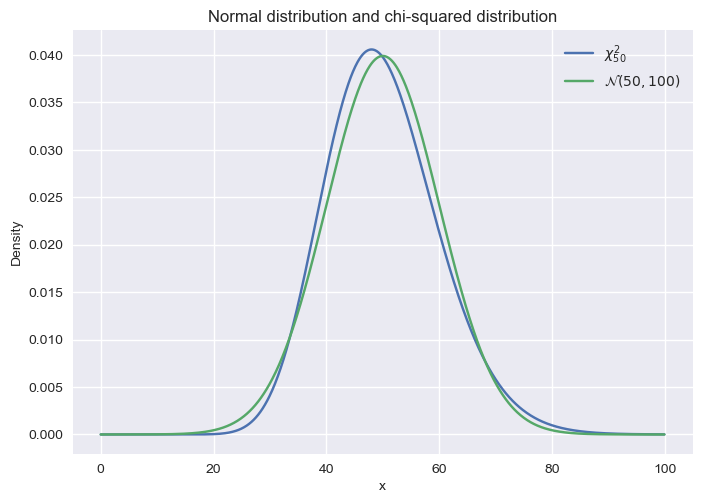

In [7]:
ddl = 50

chi2 = stats.chi2(df = ddl)
norm = stats.norm(loc = ddl, scale = np.sqrt(2*ddl))

x = np.arange(0, 2*ddl, step=0.1)

plt.plot(x, chi2.pdf(x), label=f"$\\chi^2_{{{ddl}}}$")
plt.plot(x, norm.pdf(x), label=f"$\\mathcal{{N}}({ddl},{2*ddl})$")
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Normal distribution and chi-squared distribution");

**Answer.**

We recall that if $(X_n)_{n \ge 1}$ is a sequence of random variables following the $\mathcal N(0, 1)$ distribution,
$\sum_{i=1}^n X_i^2 \sim \chi_n^2$.
Moreover, the Central Limite Theorem indicates that : 
$$
    \sqrt n \left( \frac 1n \sum_{i=1}^n X_i^2 - \mathbb E[X_1^2] \right) \xrightarrow[n\to\infty]{\mathcal L} \mathcal N \left(0, \mathbb V(X_1^2) \right),
$$
i.e.
$$
    \frac{1}{\sqrt n} \left( \sum_{i=1}^n X_i^2 - n \right) \xrightarrow[n\to\infty]{\mathcal L} \mathcal N \left(0, 2 \right).
$$
Thus, $\sum_{i=1}^n X_i^2 \overset{\mathcal L}{\approx} \mathcal N \left(n, 2n \right)$ when $n$ grows.

>**Question 2.**
Display on the same graph the densities of the $\mathcal{T}_{5}$, $\mathcal{T}_{30}$ and $\mathcal{N}(0,1)$ distributions.
>
> What do you observe ? How can you justify it ? 

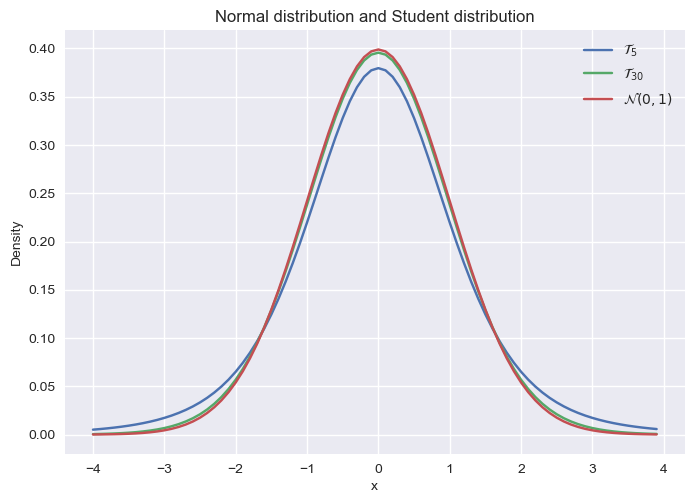

In [6]:
d1 = 5
d2 = 30

t1 = stats.t(df = d1)
t2 = stats.t(df = d2)
norm = stats.norm()

x = np.arange(-4, 4, step=0.1)

plt.plot(x, t1.pdf(x), label=f"$\\mathcal{{T}}_{{{d1}}}$")
plt.plot(x, t2.pdf(x), label=f"$\\mathcal{{T}}_{{{d2}}}$")
plt.plot(x, norm.pdf(x), label=f"$\\mathcal{{N}}(0,1)$")  
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Normal distribution and Student distribution");

**Answer.**

Let $X \sim \mathcal N(0, 1)$ and $Y \sim \chi_d^2$ be two independants random variables.
By definition, the $\mathcal T_d$ distribution is that of the variable $\frac{X}{\sqrt{\frac{Y}{d}}}$, with $\sqrt{\frac{Y}{d}} \xrightarrow[d\to\infty]{\mathbb P} 1$.
Slutsky's theorem ensures that $\frac{X}{\sqrt{\frac{Y}{d}}} \xrightarrow[d\to\infty]{\mathcal L} \mathcal N(0, 1)$.

>**Question 3.**
Display on the same graph the densities of 
Display on the same graph the densities of the Fisher distribution $\mathcal{F}^3_{20}$ and $\frac{\chi_3^2}{3}$. Recall that if $X$ follows a distribution with default parameters, then the varaible $Y=$ `scale` $X$+`loc` follows the scaled and shifted distribution. 
>
> What do you observe ? How can you justify it ? 

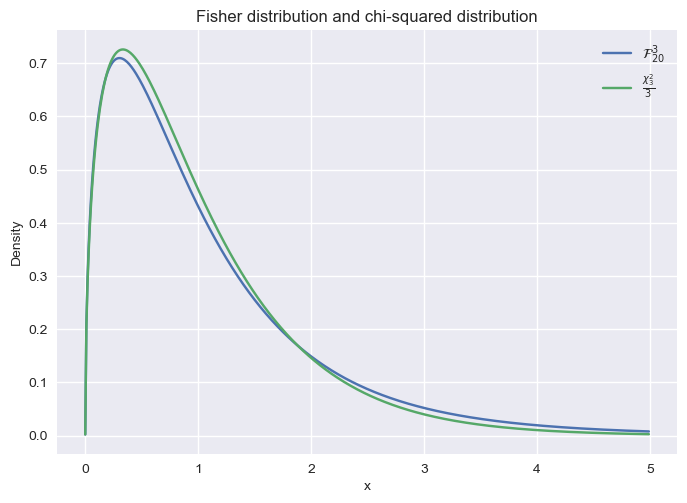

In [8]:
d1 = 3
d2 = 20

f = stats.f(d1, d2)
chi = stats.chi2(df=d1, scale=1/3)

x = np.arange(1e-6, 5, step=0.01)

plt.plot(x, f.pdf(x), label=f"$\\mathcal{{F}}^{{{d1}}}_{{{d2}}}$")
plt.plot(x, chi.pdf(x), label=f"$\\frac{{\\chi^2_{{{d1}}}}}{{{d1}}}}}$")
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Fisher distribution and chi-squared distribution");

**Answer.**

Let $X \sim \chi_p^2$ and $Y \sim \chi_d^2$ be two independants random variables.
By definition, the $\mathcal F_d^p$ distribution is that of the variable $\frac{\frac{X}{p}}{\frac{Y}{d}}$, with $Y/d \xrightarrow[d\to\infty]{\mathbb P} 1$.
Slutsky's theorem ensures that $\frac{\frac{X}{p}}{\frac{Y}{d}} \xrightarrow[d\to\infty]{\mathcal L} \frac{\chi_p^2}{p}$.

## Exercise 2 : Law of Large Numbers. <a id="part2"></a>
>**Question 1.**
Illustrate the Law of Large Numbers for the Beta distribution with parameters $(\alpha, \beta) = (2,5) $. 
Hint : to calculate the successive means, you can use the `cumsum` function.

Support of the Beta distribution :  (0.0, 1.0)
Target value :  0.2857142857142857


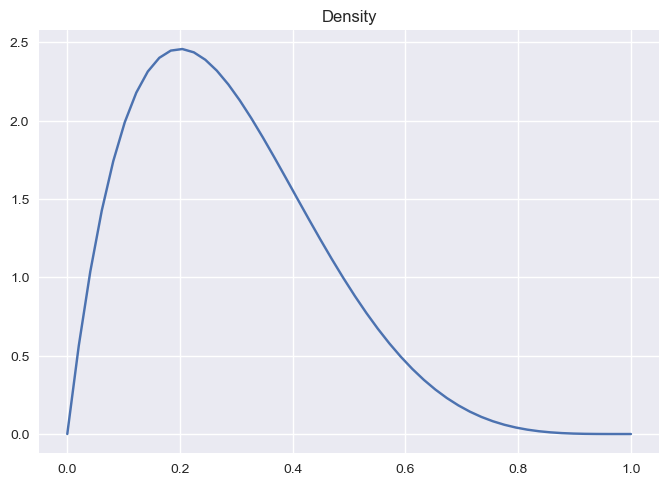

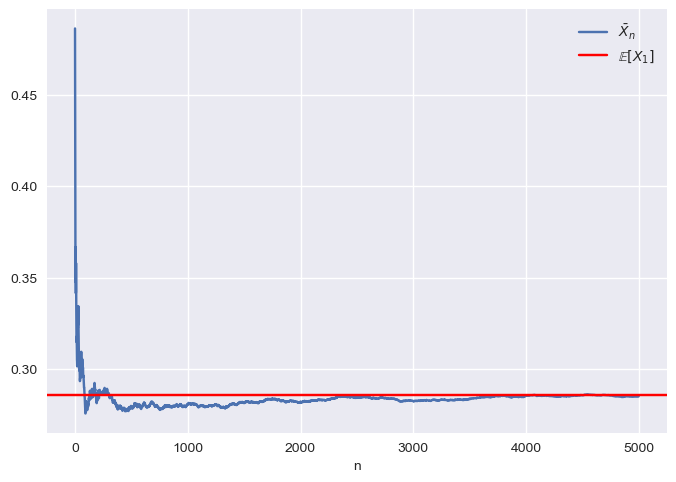

In [16]:
dist = stats.beta(a=2, b=5)
print("Support of the Beta distribution : ", dist.support())
print("Target value : ", 2/(2+5))

x = np.linspace(0, 1)
plt.plot(x, dist.pdf(x))
plt.title("Density")

n = 5000
X = dist.rvs(size=n) #Generates a random sample of size n. 
fig = plt.figure()

means = X.cumsum() / np.arange(1, n+1)

plt.plot(means, label="$\\bar{{X}}_n$")
plt.axhline(dist.mean(), color='red', label="$\\mathbb{{E}} [X_1]$")
plt.xlabel('n')
plt.legend();

> With several curves, it gives : 

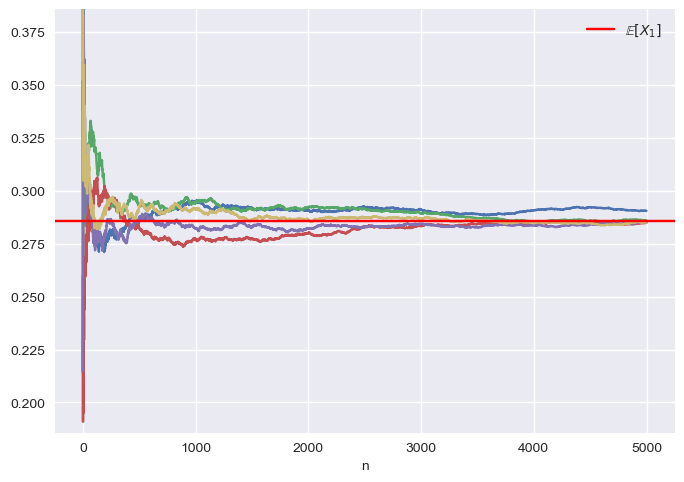

In [20]:
N, n = 5, 5000
X = dist.rvs(size=(N, n)) #Draw 5 random samples, each of size 5000. 

means = X.cumsum(axis=1) / np.arange(1, n+1)

plt.figure()
for row in means:
    plt.plot(row)
    
plt.axhline(dist.mean(), color='red', label=r"$\mathbb{E} [X_1]$")
plt.xlabel('n')
plt.ylim((dist.mean()-0.1, dist.mean()+0.1))
plt.legend();

>**Question 2.**
Do the same with the Cauchy distribution. Plot several trajectories.

Support of the Cauchy distribution :  (-inf, inf)


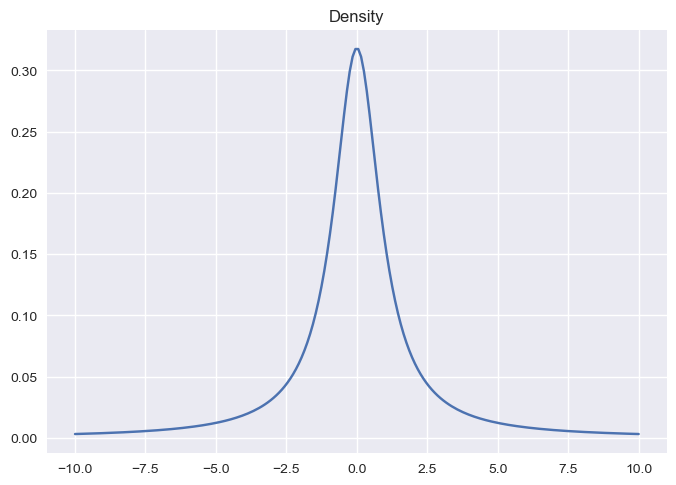

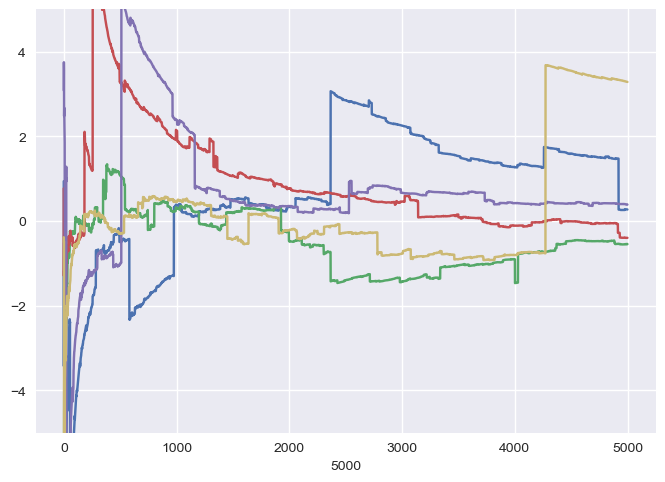

In [22]:
dist = stats.cauchy()
print("Support of the Cauchy distribution : ", dist.support())

x = np.linspace(-10, 10, num=200)
plt.plot(x, dist.pdf(x))
plt.title("Density")

N, n = 5, 5000
X = dist.rvs(size=(N, n)) #Draw 5 random samples, each of size 5000. 

means = X.cumsum(axis=1) / np.arange(1, n+1)

plt.figure()
for row in means:
    plt.plot(row)
plt.xlabel(n)
plt.ylim((-5, 5));

**Explanation.**

Recall the probability density function $f(x) = \frac{1}{\pi(1+x^2)} > 0$, with :  

$$\int_{\mathbb{R}} \frac{x}{\pi(1+x^2)} \, dx = + \infty.$$

In deed, 

$$\int_{0}^{\infty} \frac{x}{\pi(1+x^2)} \, dx = \frac{1}{2}[\ln(1+x^2)]_{0}^{+\infty} = +\infty.$$

It implies that the Cauchy distribution doesn't have a well-defined mean.

## Exercise 3 : Central Limit Theorem <a id="part3"></a>
> Display the probability density function of the Beta distribution with parameters $\alpha = 0.5$ and $\beta = 0.5$, then illustrate the Central Limit Theorem using histograms. 
>It is recalled that a histogram is an estimator of the density, and Scheffé's lemma ensures that the simple convergence of densities implies convergence in law.
>>**Scheffé's Lemma**
>>Let $(X_n)_{n\ge 1}$ be a sequence of random variables with densities  $(f_n)_{n\ge 1}$ with respect to dominant measure $\mu$
and $X$ be a random variable with density $f$ with respect to$\mu$.
If $(f_n)_{n\ge 1}$ converges simply $\mu$-almost everywhere toward $f$, then
$$
X_n \underset{n \to \infty}{\overset{\mathcal{L}}{\longrightarrow}} X.
$$

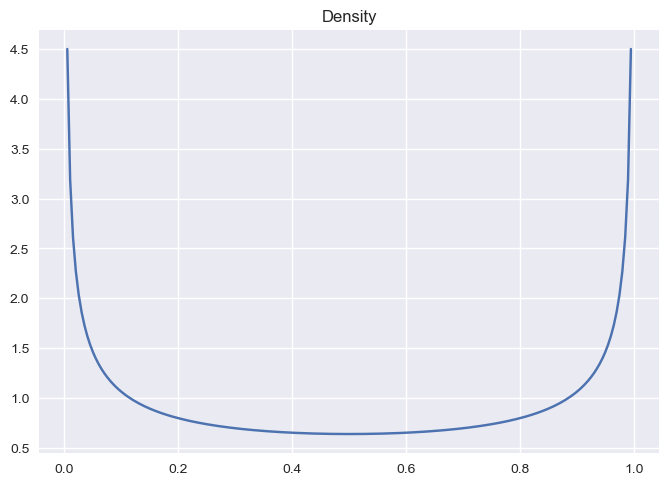

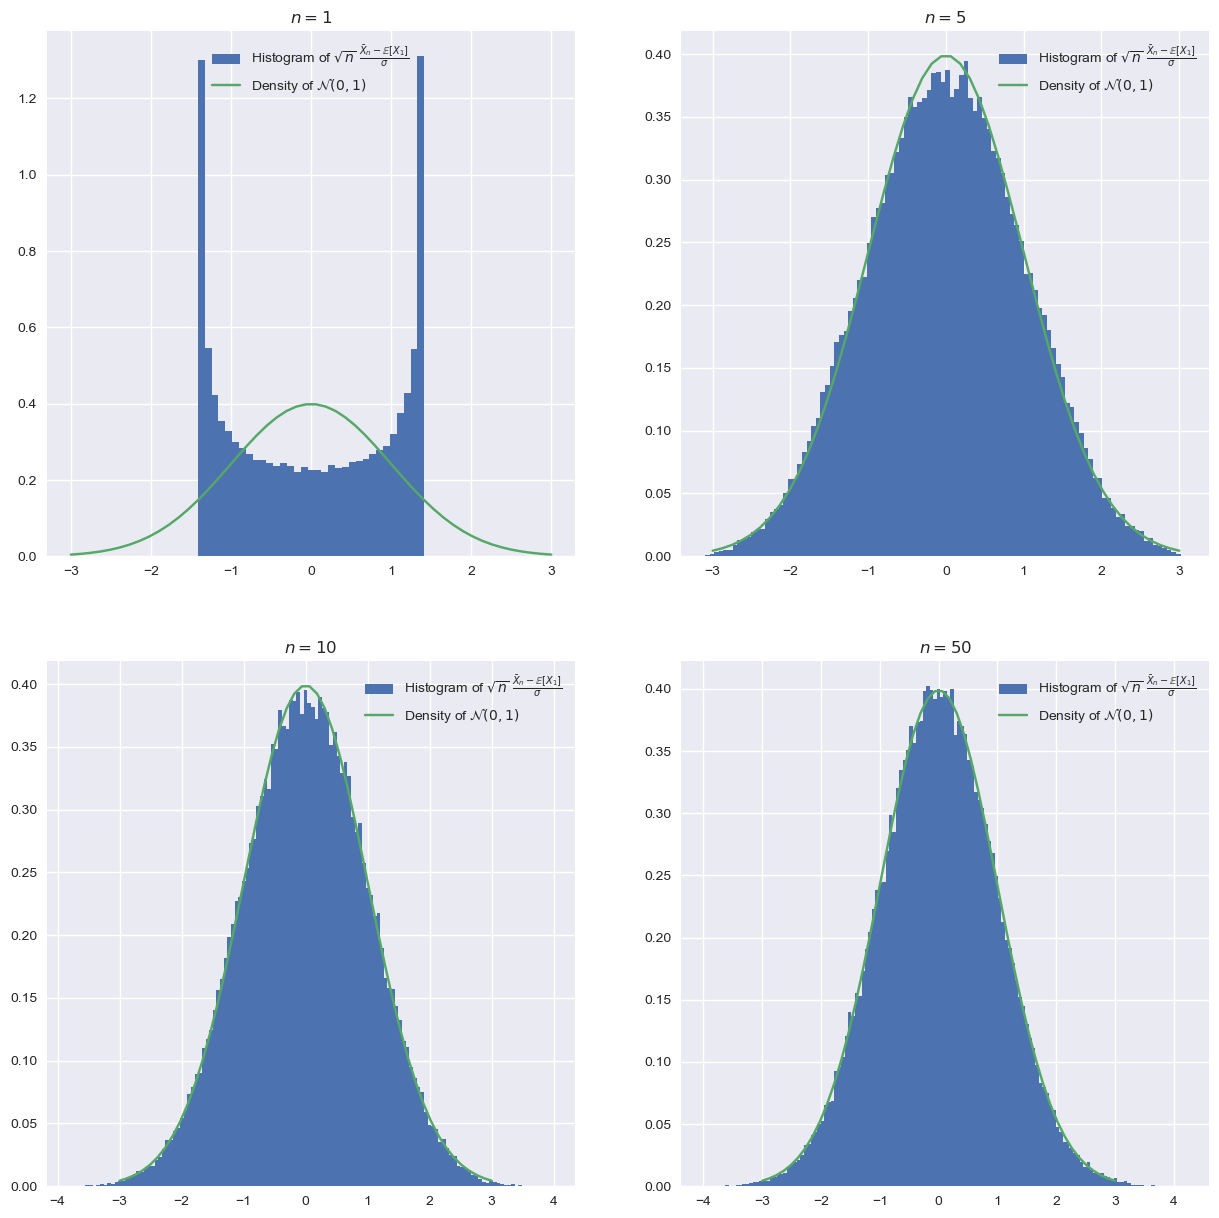

In [24]:
dist = stats.beta(a=.5, b=.5)
norm = stats.norm()

x = np.linspace(0, 1, num=200)
plt.plot(x, dist.pdf(x))
plt.title("Density")

N = 100000
x = np.linspace(-3, 3)

fig_hist = plt.figure(figsize=(15, 15))
for i, n in enumerate([1, 5, 10, 50]):
    X = dist.rvs(size=(N, n)) #Draw N random samples, each of size n. 

    means = X.mean(axis=1) 
    rv = np.sqrt(n) * (means - dist.mean()) / dist.std() #Compute a centred and reduce variable to illustrate CLT.
    plt.subplot(2, 2, i+1)
    plt.hist(rv, bins='auto', density=True, label="Histogram of $\\sqrt{{n}}\\ \\frac{{\\bar{{X}}_n - \\mathbb{{E}}[X_1]}}{{\\sigma}}$")  #normed=True, for old versions
    plt.plot(x, norm.pdf(x), label="Density of $\\mathcal{{N}}(0, 1)$")
    plt.legend()
    plt.title("$n = %d$" % n)

## Exercise 4 : Simple Linear Regression <a id="part4"></a>
>Let's consider the model defining, for all $i \in \{1, \dots, n\}$, the observations $$Y_i = a + b t_i  + \varepsilon_i,$$ where $t_1, \dots, t_n$ are fiexed data, $\varepsilon_1, \dots, \varepsilon_n$ are i.i.d random variables following the $\mathcal{N}(0, \sigma^2)$ distribution.
We aim to estimate the unknown parameters $\beta=(a, b)$ and $\sigma^2$.

In [25]:
n = 50
t = np.linspace(0, 10, n)
X = np.column_stack((np.ones((n)),t))

beta = [2, -1]
y_true = X @ beta 

sigma = 2
noise = stats.norm(scale=sigma)
y = y_true + noise.rvs(size=n)

>**Question 1.**
Display, as a function of $(t_i)_{1 \le i \le n}$ the observations $(Y_i)_{1 \le i \le n}$ and the « true » line $y = a + b t$.

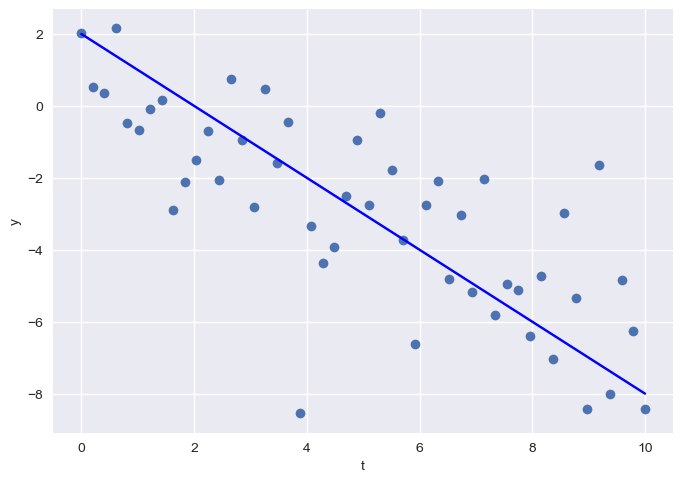

In [29]:
plt.plot(t, y, 'o', label="Observations")
plt.plot(t, y_true, 'b-', label="True line")
plt.xlabel('t')
plt.ylabel('y');

>**Question 2.**
Solve the linear regression problem using the `sm.OLS` and display the results table.

In [30]:
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     64.43
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           2.01e-10
Time:                        14:31:25   Log-Likelihood:                -100.16
No. Observations:                  50   AIC:                             204.3
Df Residuals:                      48   BIC:                             208.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5590      0.510      1.096      0.279      -0.467       1.585
x1            -0.7056      0.088     -8.027      0.000      -0.882      -0.529
==============================================================================
Omnibus:                        8.157   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.324
Skew:                          -0.569   Prob(JB):                      0.00945
Kurtosis:                       4.784   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>**Question 3.**
Retrieve through calculation the values of the realizations of the least squares estimators $\hat \beta$ and $\hat \sigma_n^2$ given above, that is : 

In [36]:
print("Beta estimator :", res.params)
print("sigma2 estimator :", res.scale)

Beta estimator : [ 0.55895245 -0.70564179]
sigma2 estimator : 3.3517477835950658


In [35]:
inv = np.linalg.inv(X.T @ X)
H = X @ inv @ X.T  # Hat matrix.
hat_beta = inv @ X.T @ y
estim = H @ y
hat_sigma2 = np.linalg.norm(y - estim)**2 / (n-2)

print("Beta estimator :", hat_beta)
print("sigma2 estimator :", hat_sigma2)

Beta estimator : [ 0.55895245 -0.70564179]
sigma2 estimator : 3.351747783595066


>**Question 4.**
Add to the previous graph the estimated line $y=\hat{a}+\hat{b}t$.

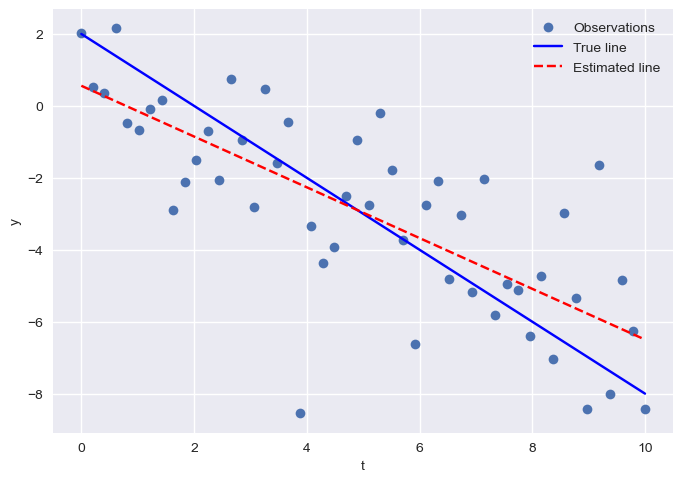

In [37]:
plt.plot(t, y, 'o', label="Observations")
plt.plot(t, y_true, 'b-', label="True line")
plt.plot(t, estim, 'r--', label="Estimated line")
plt.xlabel('t')
plt.ylabel('y')
plt.legend();

>**Question 5.**
Compute and add to the figure the prediction hyperbola at the $(1-\alpha)$ with $\alpha = 5\%$.

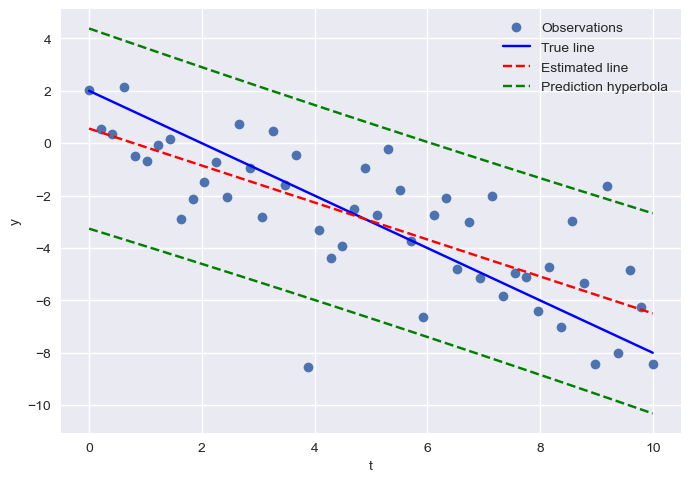

In [38]:
stu = stats.t(n-2)
q = stu.ppf(1-0.05/2)
dev = q * np.sqrt(hat_sigma2 * (1 + np.diag(H)))

plt.plot(t, y, 'o', label="Observations")
plt.plot(t, y_true, 'b-', label="True line")
plt.plot(t, estim, 'r--', label="Estimated line")
plt.plot(t, estim + dev, 'g--', label="Prediction hyperbola")
plt.plot(t, estim - dev, 'g--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend();

## Exercise 5 : Convergence in law <a id="part5"></a>
> Consider a sequence of i.i.d. random variables $(X_i)_{i\geq 1}$ following an exponential distribution with parameter 1. For all $n$, let $M_n:=X_{(n)}-\log n$ where $X_{(n)}:=\max_{1\leq i\leq n}X_i$. Using the criteria of cumulative distribution functions, numerically illustrate the fact that $M_n$ converges in law to a Gumbel distribution.

> Note : The cumulative distribution function of Gumbel distribution is : $F(x)=\exp(-\exp(-x))$. 

**Answer.**

Denote $F_n$ as the cumulative distribution function of $M_n$, a common computation yields : 
$$F_n(x)=\left(1-\frac{e^{-x}}{n}\right)^n\mathbf{1}_{x\geq -\log n}$$
and it is verified that, for any real $x$,
$$F_n(x)\xrightarrow[n\to\infty]{}\exp(-\exp(-x))=F(x).$$

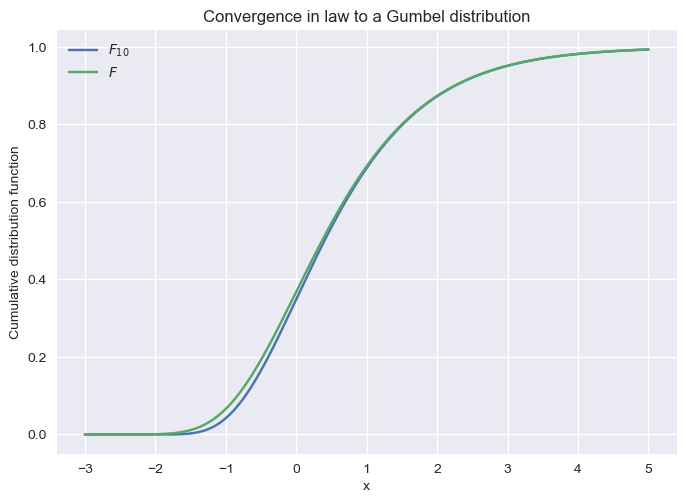

In [39]:
n = 10
x = np.linspace(-3, 5, num=200)

Fn = (1-np.exp(-x)/n)**n * (x > -np.log(n))

plt.plot(x, Fn, label=f"$F_{{{n}}}$")
plt.plot(x, np.exp(-np.exp(-x)), label="$F$")
plt.legend()
plt.xlabel('x')
plt.ylabel('Cumulative distribution function')
plt.title("Convergence in law to a Gumbel distribution");

## Exercise 6 : Comparison of Estimators <a id="part6"></a>
>Let $X$ be a real random variable with density $f_{\theta^\star}$, where $\theta^\star \in \mathbb R_+^*$ is unknown and for all $\theta > 0$,
$$f_\theta : x \in \mathbb R \mapsto \frac{1}{\theta} \exp \left( -\frac{x-\theta}{\theta} \right) \mathbb 1_{[\theta, +\infty[}(x).$$
Thus, $X$ follows a translated exponential distribution with $\theta^\star$ and scaled by $\theta^\star$.
In other words, $\frac{X-\theta^\star}{\theta^\star} \sim \mathcal{E}(1)$.
>
>Suppose we have an $n$-sample $\mathbf X = (X_1, \dots, X_n)$ where the random variables are identically distributed as $X$.
Consider the following three estimators of $\theta^\star$:
$$
		T_{1, n}(\mathbf X) = \frac{1}{2n} \sum_{i=1}^n X_i,
		\qquad
		T_{2, n}(\mathbf X) = \frac{x_{1/2}(n)}{1+\ln(2)} % x_{1/2}(n)
		\quad \text{et} \quad
		T_{3, n}(\mathbf X) = \min_{1 \le i \le n} X_i,
$$
where $x_{1/2}(n)$ is the empirical median of $\mathbf X$.
>
>**Question 1.**
For numerical illustrations, let's assume the unknown parameter is $\theta^\star=4$.
Plot the density of $X$.
Display the mean and variance $X$ and verify that the results are consisten with the theorical values. 

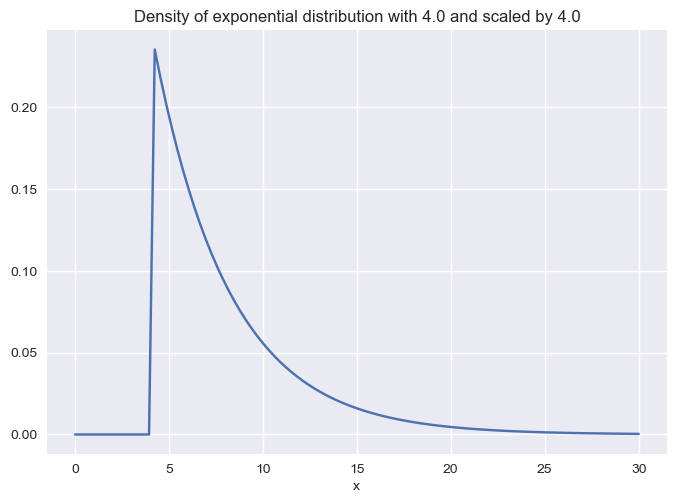

In [41]:
from scipy.stats import expon

theta = 4.
dist = expon(loc=theta, scale=theta)

t = np.linspace(0, 30, num=100)
plt.xlabel('x')
plt.plot(t, dist.pdf(t))
plt.title(f'Density of exponential distribution with {theta} and scaled by {theta}');

In [42]:
print("Mean :", dist.mean())
print("Variance :", dist.var())

Mean : 8.0
Variance : 16.0


>**Question 2.**
Let $n=200$.
Randomly draw a sample of size $n$ from the distribution of $X$ and calculate the realizations of the three estimators.
Diplay their values 
>
>Hint : The empirical median of a sample $\mathbf X$ can be obtained using the command `np.quantile(X, 0.5, interpolation='lower')` ou `np.percentile(x, 50, interpolation='lower')`.

In [49]:
n = 200

x = dist.rvs(size=n)
T1 = x.mean() / 2
T2 = np.quantile(x, 0.5, interpolation='lower') / (1+np.log(2))
T3 = x.min()

print(T1, T2, T3)

4.265587978487602 4.082114667681074 4.007770911712406


>**Question 3.**
Let $N=1000$.
Randomly draw $N$ samlpes $\mathbf X_1, \dots, \mathbf X_N$ of size $n$ independently and identically distributed as $\bf X$.
Calculate and then display an estiamtion of the quadratic risk of each of the three estimators $T_{k, n}$ ($k \in \{1, 2, 3\}$) :
$$
    R_{k, n} = \frac{1}{N} \sum_{j=1}^N (T_{k, n}(\mathbf X_j) - \theta^\star)^2.
$$

In [51]:
N = 1000

x = dist.rvs(size=(n, N))
T1 = x.mean(axis=0) / 2
T2 = np.quantile(x, 0.5, interpolation='lower', axis=0) / (1+np.log(2))
T3 = x.min(axis=0)

for label, T in [('Mean', T1), ('Median', T2), ('Minimum', T3)]:
    print(label, ":", np.mean((T-theta)**2))

Mean : 0.019956812838520896
Median : 0.02582001941603378
Minimum : 0.0008947557448638788


>**Question 4.**
Repeat this operation for several values of $n$ ranging from 10 to 200, then display (with a logarithmic scale in both x and y axes) the evolution of the estimated quadratic risk $R_{k, n}$ ($k \in \{1, 2, 3\}$) as a function of $n$.
Wich estimator seems preferable to you ? 

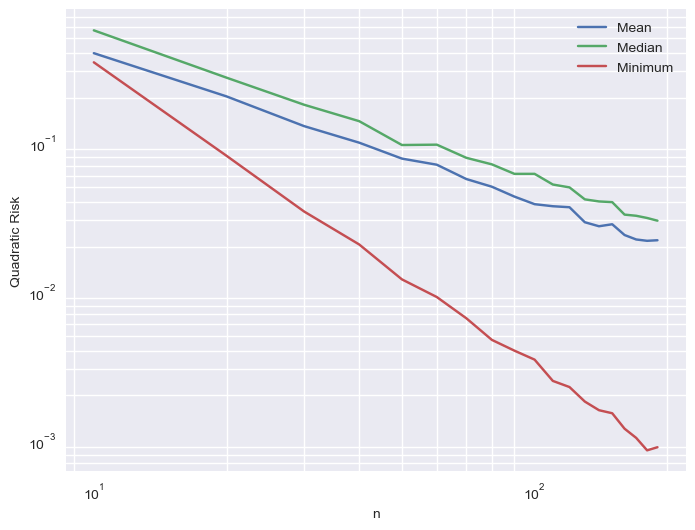

In [57]:
R1 = []
R2 = []
R3 = []
n_values = np.arange(10, 200, 10)
for n in n_values:
    x = dist.rvs(size=(n, N))
    T1 = x.mean(axis=0) / 2
    T2 = np.quantile(x, 0.5, axis = 0) / (1+np.log(2))
    T3 = x.min(axis=0) #The best one. 
    
    for R, T in [(R1, T1), (R2, T2), (R3, T3)]:
        R.append(np.mean((T-theta)**2))

plt.figure(figsize=(8, 6))
for R, T, label in [(R1, T1, "Mean"), (R2, T2, "Median"), (R3, T3, "Minimum")]:
    plt.plot(n_values, R, label=label)
plt.xlabel('n')
plt.ylabel('Quadratic Risk')
plt.legend(loc="best")
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")

## Exercise 7 : Empirical Distribution Function <a id="part7"></a>
> Consider a sequence of i.i.d. random variables $(X_i)_{i\geq 1}$ following a Cauchy distribution with cumulative distribution function denoted by $F$. For all $n\geq 1$ and for any real number $x$, consider the empirical distribution function : 
$$F_n(x):=\frac{1}{n}\sum_{i=1}^n\mathbf{1}_{X_i\leq x}.$$
Illustrate the convergence of $F_n$ to $F$. The `ECDF` class from the `statsmodels.distributions.empirical_distribution` module can be used for this purpose. 

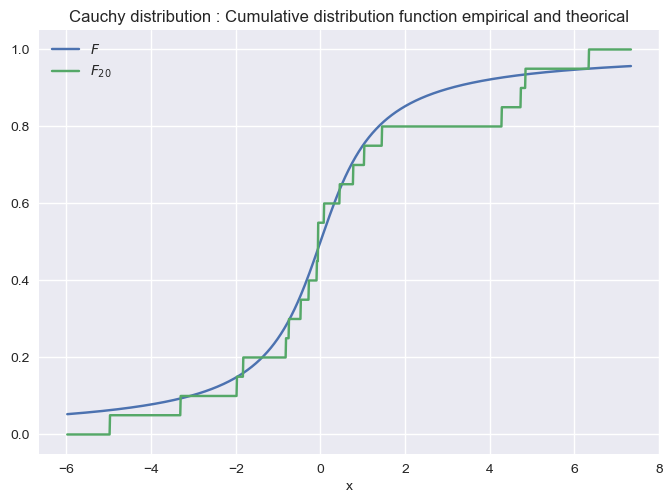

In [58]:
from statsmodels.distributions.empirical_distribution import ECDF

n = 20
dist = stats.cauchy()

X = dist.rvs(size=n)
x = np.arange(X.min()-1, X.max()+1, step=0.01)

ecdf = ECDF(X)

plt.plot(x, stats.cauchy.cdf(x), label=r"$F$")
plt.plot(x, ecdf(x), label=r"$F_{%d}$" % n)
plt.xlabel('x')
plt.legend()
plt.title("Cauchy distribution : Cumulative distribution function empirical and theorical");

## Exercise 8 : Estimator, Test, and Power Function <a id="part8"></a>
>**Question 1.**
Let $\theta = 2$ and $(X_1, \dots, X_n)$ be an $n$-sample distributed according to $\mathcal{E}(\theta)$.
Suppose $n=50$.
Generate a realization of $(X_1, \dots, X_n)$.
Display an histogram of this realization and overlay the probility density. 

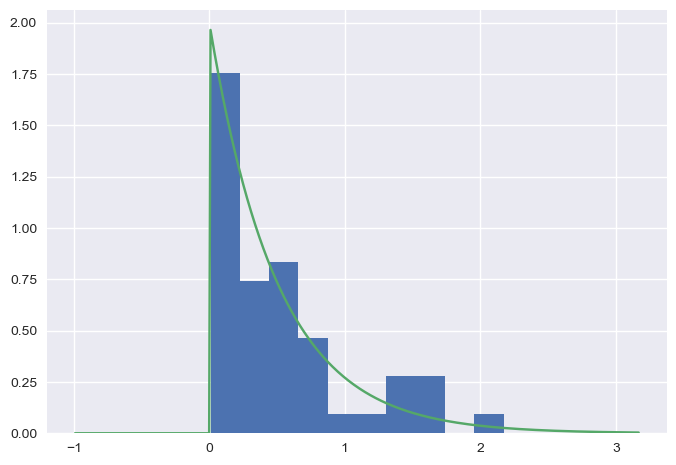

In [65]:
theta = 2
n = 50

dist = stats.expon(scale = 1/theta)
X = dist.rvs(size=n)

x = np.arange(X.min()-1, X.max()+1, step=0.01)

plt.hist(X, bins=10, density=True)
plt.plot(x, dist.pdf(x));

>**Question 2.**
Provide an estimator $\hat \theta_n$ of $\theta$ by the method of moments an calculate its relization.

**Answer.**

Because of $\mathbb{E}_\theta[X_1]=\frac{1}{\theta}$, we consider the estimator $\hat \theta_n:=\frac{1}{\bar X_n}$.

In [66]:
estim = 1/X.mean()
print("Estimation :", estim)

Estimation : 1.8749870764742065


>**Question 3.**
We want to test $H_0 : \theta = 1$ against $H_1 : \theta \neq 1$.
Construct a level asymptotic test $\alpha$ (with $\alpha = 5\%$) for the previous hypotheses. 
Display its realization and the associated $p$-value.
Draw a conclusion. 

**Answer.**

We have 
$$\sqrt n \left(\bar X_n - \frac 1 \theta\right) \xrightarrow[n \to \infty]{\mathcal L} \mathcal N \left(0, \frac{1}{\theta^2}\right).$$
By the delta method : 
$$\sqrt n \left(\frac{\hat \theta_n}{\theta} - 1\right) \xrightarrow[n \to \infty]{\mathcal L} \mathcal N(0, 1)$$
and in particular, under $H_0$, 
$$\sqrt n \left(\hat \theta_n - 1\right) \xrightarrow[n \to \infty]{\mathcal L} \mathcal N(0, 1).$$
Let $q$ be the $(1-\frac \alpha 2)$-quantile of the$\mathcal N(0, 1)$ distribution.
Then $I = \left[\hat \theta_n \pm \frac{q}{\sqrt n} \right]$ is an asymptotic level $(1-\alpha)$ confidence interval for $1$, and $T = \mathbb 1_{1 \notin I} = \mathbb 1_{|\hat \theta_n - 1| > \frac{q}{\sqrt n}}$ is an asymptotic test level $\alpha$ test for $H_0$.

For a realization $t$ of $\hat \theta_n$, the $p$-value associated with the test is $\alpha_0 = 2(1 - \Phi(\sqrt n |t - 1|))$.

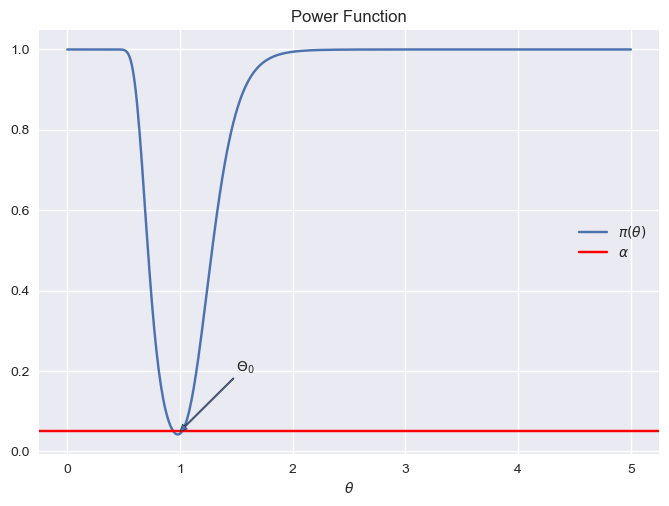

In [67]:
x = np.linspace(1e-5, 5, num=500)
power = 1 - norm.cdf(np.sqrt(n) * (1/x - 1) + q / x) + norm.cdf(np.sqrt(n) * (1/x - 1) - q / x)

plt.plot(x, power, label='$\\pi(\\theta)$')
plt.axhline(5e-2, color='red', label="$\\alpha$")
plt.legend()
plt.xlabel('$\\theta$')
plt.title('Power Function')
plt.annotate('$\\Theta_0$', xy=(1, 5e-2), xytext=(1.5, .2), arrowprops=dict(width=1, headwidth=5, headlength=5));

>**Question 4.**
What happens as $n$ grows ? 

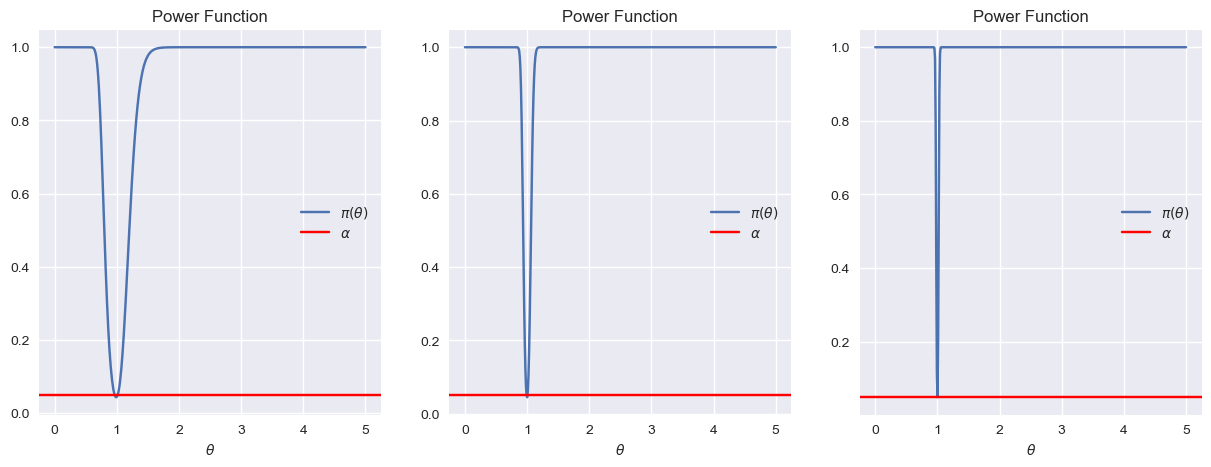

In [68]:
plt.figure(figsize=(15, 5))
for i, n in enumerate([100, 1000, 10000]):
    power = 1 - norm.cdf(np.sqrt(n) * (1/x - 1) + q / x) + norm.cdf(np.sqrt(n) * (1/x - 1) - q / x)

    plt.subplot(1, 3, i+1)
    plt.plot(x, power, label='$\\pi(\\theta)$')
    plt.axhline(5e-2, color='red', label="$\\alpha$")
    plt.legend()
    plt.xlabel('$\\theta$')
    plt.title('Power Function')

**Answer.**

As expected, the sequence of power functions $\pi_n(\theta)$ appears to converge simply to $\alpha\mathbb 1_{\theta=1}+\mathbb 1_{\theta\neq1}$.